# Leading Ladies and Lost Revenue: A Causal Analysis of Female

Representation and Box-Office Returns

Lizzie Healy (Georgetown University)  
August 1, 2025

This work will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue. This will be accomplished utilizing propensity weighting, which will match movies based on the perceived similarity of their characteristics. These predictor variables will include the year, season of release, genre, runtime, director and writers, star power level of the cast, MPAA rating, IMDb Metascore, IMDb Votes, number of awards won, country of release, language, film description, the production budget, the aspect ratio, the color, the countries of origin, filming locations, production companies, and tagline. To deal with the variables that are non-numeric the following steps will be taken. Firstly, a network analysis will be performed on the cast to produce a measure of centrality of the actors/actresses. Secondly, a sentiment analysis will be performed on the film description and tagline. The primary outcome variable will be the box-office number measured in US dollars, measured as the gross value worldwide. The IMDb score will be employed as an additional outcome measure to be used as a robustness check. A secondary robustness check may be employed in which the primary variable of interest will be whether the film passes the Bechdel test, indicating true female representation in the film. The initial hypothesis is that films that opt to feature a female in the leading role will experience a decrease value in the box office revenue.

## 1 Introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#| label: fig-timeline
#| fig-cap: Visual of the 
#| fig-alt: An event plot of the years of the last 8 eruptions on La Palma.

### 1.1 Causality

My previous paper: [Behind the Box Office: Directorial Influence on Film Revenue in the United States Entertainment Industry](./assets/thesis.pdf) attempted to analyze the link between director quality and box-office success of a film. The paper created two novel measures of director quality; a summation of all box-office revenue earned by and the director’s films and the accumulated number of critical awards from the fifteen years leading up to the film in question. The main dependent variable was domestic box-office revenue and a robustness check was implemented changing the dependent variable to the IMDb rating earned.

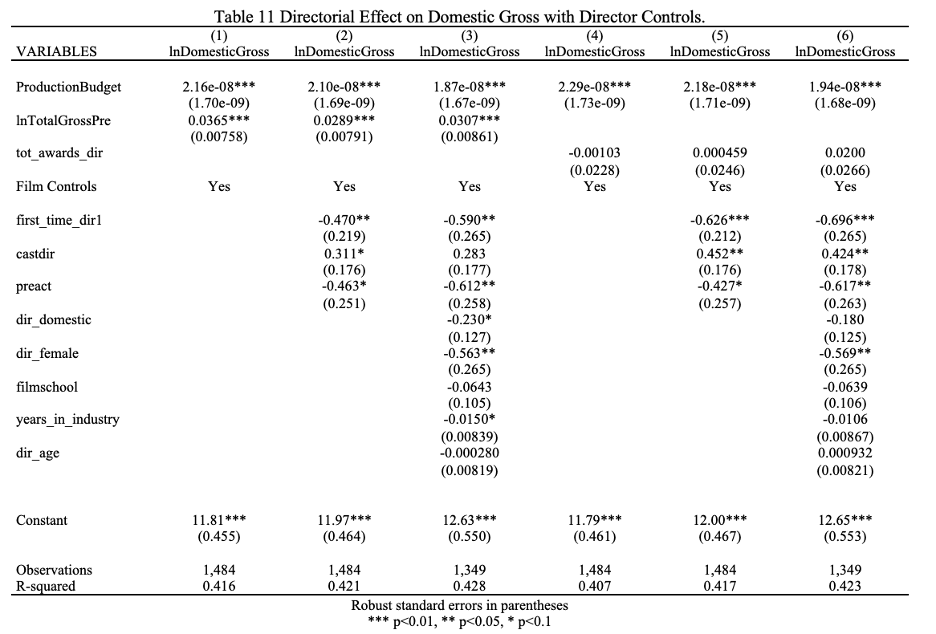 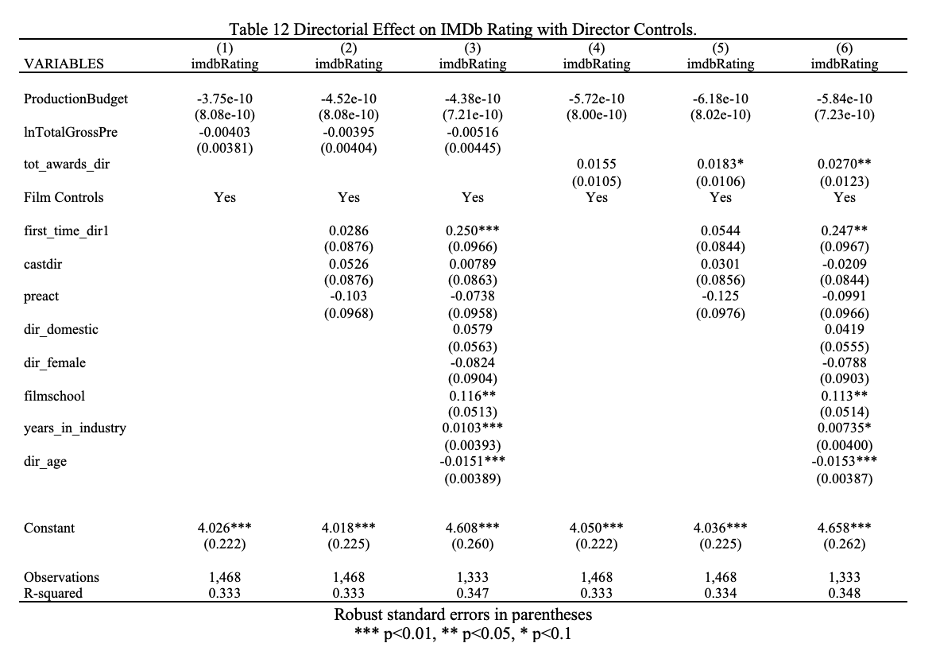

The paper found an increase in director financial quality yielded between a 0.0289% and 0.0307% increas in domestic gross and no impact on IMDb rating. Conversely, director quality in terms of critical acclaim yielded no significant impact on domestic gross, but betweeen 0.01803 and 0.0270 point increase in IMDb rating. The paper also discovered a statistically significant decrease in domestic gross for demale directors as compared to male directors.

Overall, the results were thought-provoking, however, the methodology used was lacking in the causality department. This paper, if anything, worked towards establishing a weak association due to it statical analysis going only so far as a simple ordinary-least-squares regression and controlling for confounding variables. While, the variables were considered and included in the regression equation, they were all treated equally as controls, thus a more complex analysis is warranted.

Furthermore, I wanted to investigate the conclusion of gender bias further and shifted this analysis to examine actors instead of directors.

Moving forward, the work to get to causality includes introducing causality instead of just controlling for all covariates.

Thus, this paper will investigate the impact of gender bias in the film industry pertaining to economic outcomes. Specifically, it will attempt to establish a causal link between a film casting a female actress in the leading role and the resulting box-office revenue by employing propensity score matching.

Need to argue that there is sufficient common support between the treatment and control groups in a dataset in order to use propensity scores.

Data collection and preparation is discussed in <a href="#sec-data" class="quarto-xref">Section 2</a>.

Methodology and propensity scoring is discussed in <a href="#sec-meth" class="quarto-xref">Section 3</a>

Results and anlysis are disucssed in <a href="#sec-results" class="quarto-xref">Section 4</a>

Conluding remarks, limitations, and future work are discussed in <a href="#sec-conclusion" class="quarto-xref">Section 5</a>

## 2 Data

Data was collected from IMDb utilizing two separate APIs: OMDB and TMDB.

https://www.omdbapi.com/  
https://www.themoviedb.org/

The datasets were merged on the movie title

Cleaning:

-   dropped unimportant columns  
-   dropped missing values and zeros  
-   converted to correct data types  
-   one-hot encoded categorical variables  
-   Big Production Company Variable  
-   Top 25 Director  
-   Top 20 Writer  
-   English/Other Language  
-   Domestic/International

2,816 movies

61 columns

Variables:

-   year  
-   runtime  
-   budget  
-   Month of release  
-   Day of Release\*\*  
-   Genre (Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Film Noir, History, Horror, Music, Mystery, Romance, Sci-Fi, Sport, Thriller, War, Western w/ Musical excluded)  
-   MPAA Rating (G, GP, M, M/PG, NC-17, Not-Rated, PG, PG-13, R, TV-MA, Unrated w/ Accepted excluded)  
-   Top Production Company  
-   Top Director  
-   Top Writer  
-   Domestic (w/ International excluded)  
-   English Language (w/ Other excluded)  
-   Sentiment of Description  
-   Sentiment of Tagline  
-   Starpower Metric

outcomes:

-   box office  
-   imdb rating

Add in some descriptive statistics of the dataset.

| Name         | Year |
|--------------|------|
| Female Leads | 488  |
| Male Leads   | 2328 |

Table 1: Male versus Female Director

<a href="#tbl-history" class="quarto-xref">Table 1</a>

## 3 Methodology

### 3.1 Sentiment Analysis of tagline and description

BERT model for sentiment analysis  
created labels of 0/1 for tagline and movie description

### 3.2 Creation of the starpower variable

Collected lists of A-list and B-list actors/actresses  
Added 2 points if one of the cast members was A-list  
Added 1 point if one of the cast members was B-list  
Averaged by dividing score by 3 (number of cast members)

| actor1         | actor2            | actor3          | starpower |
|----------------|-------------------|-----------------|-----------|
| Mark Wahlberg  | Tyrese Gibson     | André 3000      | 0.666667  |
| Jamie Bell     | Andy Serkis       | Daniel Craig    | 1.333333  |
| Ryan Reynolds  | Blake Lively      | Peter Sarsgaard | 0.333333  |
| Marc Singer    | Tanya Roberts     | Rip Torn        | 0.000000  |
| Tom Hiddleston | Samuel L. Jackson | Brie Larson     | 1.000000  |
| Jeremy Renner  | Ed Helms          | Jake Johnson    | 0.000000  |
| Frankie Muniz  | Amanda Bynes      | Paul Giamatti   | 1.000000  |
| Ben Barnes     | Skandar Keynes    | Georgie Henley  | 0.000000  |
| Jason Bateman  | Charlie Day       | Jason Sudeikis  | 1.000000  |
| Jack Black     | Ana de la Reguera | Héctor Jiménez  | 0.333333  |

### 3.3 Creation of the variable that indicates female in leading role

Collected list of all female actresses  
Took the first cast member named  
Merged and created female_lead variable  
1 = female lead

| Title         | First Actor        | Female Lead |
|---------------|--------------------|-------------|
| The Family    | Robert De Niro     | 0           |
| The Shack     | Sam Worthington    | 0           |
| The Dead Zone | Christopher Walken | 0           |
| The Ref       | Denis Leary        | 0           |
| Flyboys       | James Franco       | 0           |
| ATL           | Tip ‘T.I.’ Harris  | 0           |
| Like a Boss   | Tiffany Haddish    | 1           |
| Enemy Mine    | Dennis Quaid       | 0           |
| Proud Mary    | Taraji P. Henson   | 1           |
| Valmont       | Colin Firth        | 0           |

### 3.4 Propensity score matching

StandardScaler Propensity scores calculated

### 3.5 Robustness Checks

Implemented the IMDb score as the outcome variable as a robustness check  
Does a female in the lead role impact the critical success of the film?

## 4 Results

### 4.1 Box Office Results

Female-lead had higher box-office average

### 4.2 IMDb Rating Results

Female-lead had lower IMDb scores

| Gender of Lead Role | Box Office    | IMDb Rating |
|---------------------|---------------|-------------|
| Female              | 62,708,871.36 | 6.329       |
| Male                | 61,076,707.45 | 6.601       |

## 5 Conclusion

### 5.1 Limitations:

1.  More data
2.  Network Analysis
3.  Robustness Checks with Bechdel test
4.  Inacurracy from matching female leads & first actor not always the lead
5.  Unbalanced Dataset (is this an issue?)

## References